In [1]:
# PLEASE CONSIDER:
# JOINS HAVE BEEN SUCCESSFULLY CONDUCTED AND ARE LEFT IN TO DEMONSTRATE PREVIOUS SUBMISSIONS
# JOINS ARE EXCLUDED FROM USE IN CURRENT SUBMISSION DUE TO YELP API LIMITATIONS

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
import pandas as pd

In [12]:
df_bikes = pd.read_csv('data/df_bikes.csv')
df_bikes.head()

,Unnamed: 0,id,empty_slots,free_bikes,latitude,longitude
0,0,fb337bbed72e2be090071e199899b2be,1,18,43.665269,-79.319796
1,1,4ff88d5880e71aa40d34cfe5d09b0ca7,6,8,43.671420,-79.445947
2,2,a09c67c0b419654d907c9134b108e328,2,21,43.666224,-79.317693
3,3,d6a9daee68070a8b106cfb598d81308c,21,4,43.653236,-79.376716
4,4,8f8af40d9388c8a3962559e8681d3db7,8,17,43.663722,-79.380288


In [16]:
df_fsq_unique = pd.read_csv('data/fsq_unique.csv')
df_fsq_unique.keys()

Index(['Unnamed: 0', 'fsq_id', 'categories', 'chains', 'distance', 'link',
       'name', 'timezone', 'geocodes.drop_off.latitude',
       'geocodes.drop_off.longitude', 'geocodes.main.latitude',
       'geocodes.main.longitude', 'geocodes.roof.latitude',
       'geocodes.roof.longitude', 'location.address', 'location.country',
       'location.cross_street', 'location.formatted_address',
       'location.locality', 'location.postcode', 'location.region',
       'location.address_extended', 'related_places.children',
       'related_places.parent.fsq_id', 'related_places.parent.name'],
      dtype='object')

In [132]:
df_fsq = df_fsq_unique[['name','categories','distance','geocodes.main.latitude','geocodes.main.longitude','location.address']]
df_fsq = df_fsq.rename(columns={'geocodes.main.latitude':'latitude','geocodes.main.longitude':'longitude','location.address':'address'})
df_fsq.to_csv('data/fsq_unique.csv')

In [17]:
df_yelp_unique = pd.read_csv('data/yelp_unique.csv')
df_yelp_unique.keys()

Index(['Unnamed: 0', 'id', 'alias', 'name', 'image_url', 'is_closed', 'url',
       'review_count', 'categories', 'rating', 'transactions', 'price',
       'phone', 'display_phone', 'distance', 'coordinates.latitude',
       'coordinates.longitude', 'location.address1', 'location.address2',
       'location.address3', 'location.city', 'location.zip_code',
       'location.country', 'location.state', 'location.display_address'],
      dtype='object')

In [133]:
df_yelp = df_yelp_unique[['name','categories','distance','coordinates.latitude','coordinates.longitude','location.address1','rating']]
df_yelp = df_yelp.rename(columns={'coordinates.latitude':'latitude','coordinates.longitude':'longitude','location.address1':'address'})
df_yelp.to_csv('data/yelp_unique.csv')

In [27]:
df_join1=df_yelp.join(df_fsq.set_index('name'), on='name',lsuffix='.yelp')
df_join1

,name,categories.yelp,distance.yelp,latitude.yelp,longitude.yelp,address.yelp,rating,categories,distance,latitude,longitude,address
0,Radical Road Brewing,"[{'alias': 'breweries', 'title': 'Breweries'},...",9.369660,43.662633,-79.332479,1177 Queen Street E,4.5,NaN,NaN,NaN,NaN,NaN
1,Cloak & Dagger Irish Pub,"[{'alias': 'pubs', 'title': 'Pubs'}]",13.627566,43.657140,-79.405710,394 College Street,3.5,NaN,NaN,NaN,NaN,NaN
2,Grey Gardens,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",16.644362,43.653800,-79.401430,199 Augusta Avenue,4.5,NaN,NaN,NaN,NaN,NaN
3,LCBO - Chinatown,"[{'alias': 'beer_and_wine', 'title': 'Beer, Wi...",21.358570,43.654850,-79.398280,335 Spadina Ave,2.5,NaN,NaN,NaN,NaN,NaN
4,The Black Bull,"[{'alias': 'bars', 'title': 'Bars'}]",24.343516,43.649750,-79.393290,298 Queen Street W,2.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
200,Amsterdam Brewery,"[{'alias': 'breweries', 'title': 'Breweries'}]",1105.246276,43.707033,-79.357319,45 Esandar Dr.,4.0,"[{'id': 13029, 'name': 'Brewery', 'icon': {'pr...",777.0,43.706394,-79.357118,45 Esandar Dr
201,Melrose On Adelaide,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",1164.661372,43.648150,-79.389880,300 - 270 Adelaide Strret W,4.0,NaN,NaN,NaN,NaN,NaN
202,LCBO,"[{'alias': 'beer_and_wine', 'title': 'Beer, Wi...",1198.220919,43.771085,-79.186102,4525 Kingston Rd,2.0,NaN,NaN,NaN,NaN,NaN
203,Azure Restaurant & Bar,"[{'alias': 'newcanadian', 'title': 'Canadian (...",1209.903290,43.644259,-79.385266,225 Front Street W,3.0,NaN,NaN,NaN,NaN,NaN


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

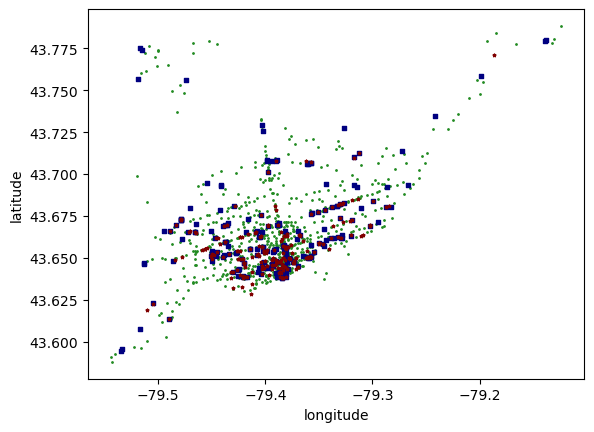

In [108]:
import matplotlib.pyplot as plt
x1 = [df_yelp['longitude']]
y1 = [df_yelp['latitude']]

x2 = [df_fsq['longitude']]
y2 = [df_fsq['latitude']]

x3 = [df_bikes['longitude']]
y3 = [df_bikes['latitude']]

plt.scatter(x3,y3,c='forestgreen',marker='o',s=1)
plt.scatter(x2,y2,c='navy',marker='s',s=5)
plt.scatter(x1,y1,c='maroon',marker='*',s=5)


plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

Firstly, visualizing the points by lat/long generates an approximation of the shape of the city. This confirms that we've collected sample data from points around the city.

We can also see a general concentration of points for each data set in the areas we would expect - downtown and its surrounding areas, along subway lines, and clustered in various places along the lines drawn by major streets.

(array([ 4., 12.,  0., 28.,  0., 45., 72.,  0., 35.,  9.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

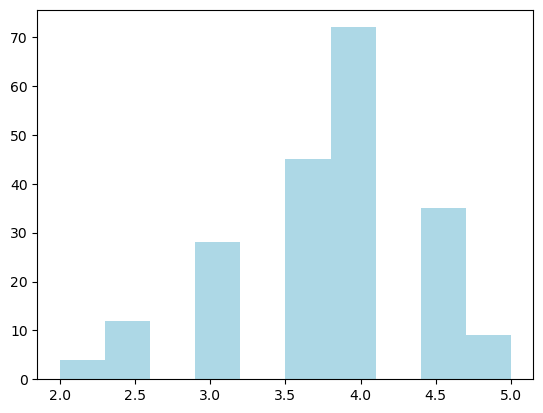

In [145]:
plt.hist(df_yelp['rating'], color='lightblue')

Our ratings appear normally distributed, though with gaps.

(array([ 4., 34., 96., 48., 16.,  4.,  2.,  0.,  0.,  1.]),
 array([43.61344237, 43.62920665, 43.64497094, 43.66073522, 43.6764995 ,
        43.69226379, 43.70802807, 43.72379235, 43.73955663, 43.75532092,
        43.7710852 ]),
 <BarContainer object of 10 artists>)

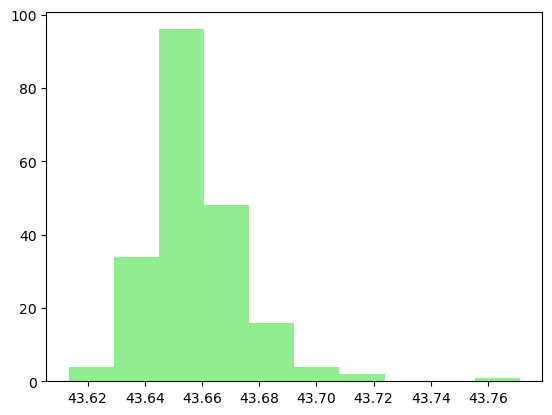

In [147]:
plt.hist(df_yelp['latitude'], color='lightgreen')

We appear to have one potential outlier in this data. Let's check.

In [138]:
mean_yelp = df_yelp['latitude'].mean()
mean_yelp

43.65748348260214

In [139]:
std_yelp = df_yelp['latitude'].std()
std_yelp

0.01746932987354072

In [141]:
outlier_plus = mean_yelp + (3*std_yelp)

In [142]:
df_yelp[df_yelp['latitude']>outlier_plus]

,name,categories,distance,latitude,longitude,address,rating
194,Muddy York Brewing,"[{'alias': 'breweries', 'title': 'Breweries'}]",760.643608,43.712400,-79.312140,22 Cranfield Road,5.0
202,LCBO,"[{'alias': 'beer_and_wine', 'title': 'Beer, Wi...",1198.220919,43.771085,-79.186102,4525 Kingston Rd,2.0


We can see that, statistically, we have two outlier latitudes. 

Since we can see that none of our points lie so far out as to skew the map, and we can assume their inclusion as outliers is a result of sparser data points at the edges of our search range, we will leave them in for now. 

It's also possible that these are caused by infrastructure / geographic features of the region (highways, power delivery pathways, rail tracks, rivers, valleys, shorelines, etc.

(array([ 9., 15., 38., 72., 40., 20., 10.,  0.,  0.,  1.]),
 array([-79.5106746, -79.4782173, -79.44576  , -79.4133027, -79.3808454,
        -79.3483881, -79.3159308, -79.2834735, -79.2510162, -79.2185589,
        -79.1861016]),
 <BarContainer object of 10 artists>)

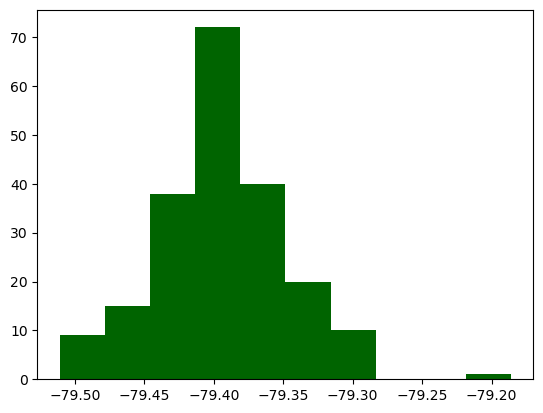

In [151]:
plt.hist(df_yelp['longitude'], color='darkgreen')

(array([ 16.,  64., 117., 282., 117.,  57.,  28.,   6.,   6.,   3.]), array([-79.54449133, -79.5023927 , -79.46029406, -79.41819543,
       -79.3760968 , -79.33399817, -79.29189953, -79.2498009 ,
       -79.20770227, -79.16560363, -79.123505  ]), <BarContainer object of 10 artists>)


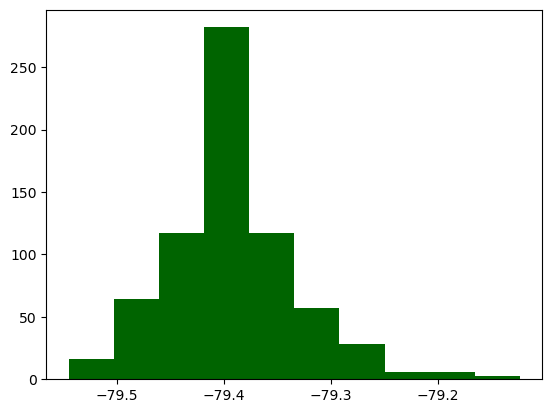

In [156]:
print(plt.hist(df_bikes['longitude'], color='darkgreen'))

(array([  7.,  10., 145., 263., 140.,  72.,  28.,   7.,   9.,  15.]), array([43.5880774 , 43.60810156, 43.62812572, 43.64814988, 43.66817404,
       43.6881982 , 43.70822236, 43.72824652, 43.74827068, 43.76829484,
       43.788319  ]), <BarContainer object of 10 artists>)


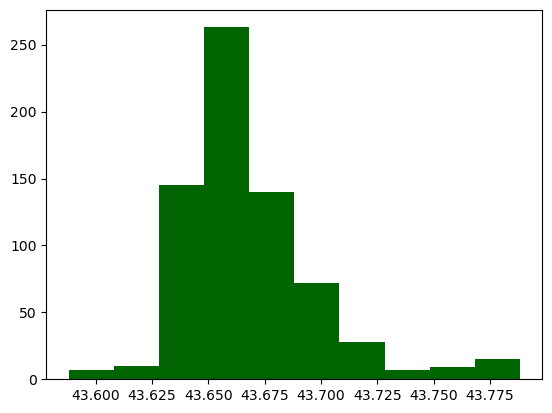

In [157]:
print(plt.hist(df_bikes['latitude'], color='darkgreen'))

We can see similar distributions in our bike data.

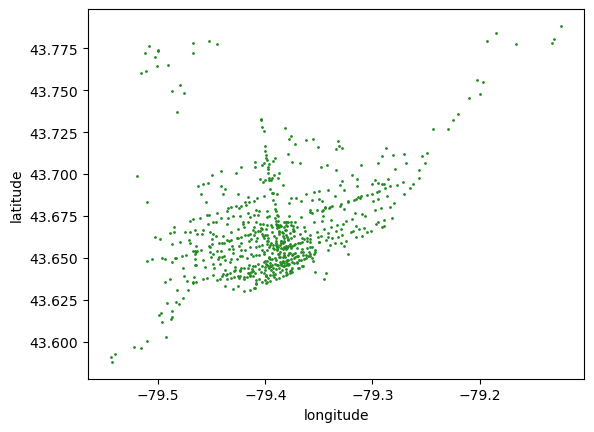

In [158]:
x = [df_bikes['longitude']]
y = [df_bikes['latitude']]

plt.scatter(x,y,c='forestgreen',marker='o',s=1)

plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

There are small clusters of bikes quite far from the others. Geographically, where are they?

In [31]:
nan_df = df_join1.isna()
nan_df.keys()

Index(['name', 'categories.yelp', 'distance.yelp', 'latitude.yelp',
       'longitude.yelp', 'address.yelp', 'rating', 'categories', 'distance',
       'latitude', 'longitude', 'address'],
      dtype='object')

In [33]:
for key in nan_df.keys():
    print(nan_df[key].value_counts())

False    221
Name: name, dtype: int64
False    221
Name: categories.yelp, dtype: int64
False    221
Name: distance.yelp, dtype: int64
False    221
Name: latitude.yelp, dtype: int64
False    221
Name: longitude.yelp, dtype: int64
False    218
True       3
Name: address.yelp, dtype: int64
False    221
Name: rating, dtype: int64
True     159
False     62
Name: categories, dtype: int64
True     159
False     62
Name: distance, dtype: int64
True     159
False     62
Name: latitude, dtype: int64
True     159
False     62
Name: longitude, dtype: int64
True     159
False     62
Name: address, dtype: int64


In [34]:
df_join1.dropna()

,name,categories.yelp,distance.yelp,latitude.yelp,longitude.yelp,address.yelp,rating,categories,distance,latitude,longitude,address
10,The 3 Brewers,"[{'alias': 'pubs', 'title': 'Pubs'}, {'alias':...",33.455415,43.655510,-79.380270,275 Yonge St,3.0,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",19.0,43.655472,-79.380321,275 Yonge St
12,Bar Hop,"[{'alias': 'bars', 'title': 'Bars'}]",36.583473,43.645599,-79.393547,391 King Street W,4.0,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",32.0,43.645579,-79.393658,391 King St W
17,Bar Hop,"[{'alias': 'pubs', 'title': 'Pubs'}]",42.716176,43.649106,-79.393496,137 Peter Street,3.5,"[{'id': 13006, 'name': 'Beer Bar', 'icon': {'p...",32.0,43.645579,-79.393658,391 King St W
18,Blood Brothers Brewing,"[{'alias': 'breweries', 'title': 'Breweries'}]",44.477390,43.669840,-79.436180,165 Geary Avenue,4.0,"[{'id': 13029, 'name': 'Brewery', 'icon': {'pr...",51.0,43.669939,-79.436128,165 Geary Ave
35,Godspeed Brewery,"[{'alias': 'breweries', 'title': 'Breweries'}]",62.721724,43.672657,-79.319100,242 Coxwell Avenue,4.0,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",87.0,43.672563,-79.319341,242 Coxwell Ave
...,...,...,...,...,...,...,...,...,...,...,...,...
196,The Beer Store,"[{'alias': 'beer_and_wine', 'title': 'Beer, Wi...",937.594455,43.707870,-79.362480,Laird Avenue,4.0,"[{'id': 17058, 'name': 'Beer Store', 'icon': {...",204.0,43.654318,-79.449379,Dundas St W
196,The Beer Store,"[{'alias': 'beer_and_wine', 'title': 'Beer, Wi...",937.594455,43.707870,-79.362480,Laird Avenue,4.0,"[{'id': 17058, 'name': 'Beer Store', 'icon': {...",581.0,43.594475,-79.534333,3580 Lake Shore Blvd W
196,The Beer Store,"[{'alias': 'beer_and_wine', 'title': 'Beer, Wi...",937.594455,43.707870,-79.362480,Laird Avenue,4.0,"[{'id': 17058, 'name': 'Beer Store', 'icon': {...",809.0,43.638510,-79.388980,3250 Queens Quay W
200,Amsterdam Brewery,"[{'alias': 'breweries', 'title': 'Breweries'}]",1105.246276,43.707033,-79.357319,45 Esandar Dr.,4.0,"[{'id': 13029, 'name': 'Brewery', 'icon': {'pr...",777.0,43.706394,-79.357118,45 Esandar Dr


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [47]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Success")
    except Error as e:
        print(f"Error '{e}' occurred")
              
    return connection

In [48]:
connection = create_connection("sm_app.sqlite")

Success


In [50]:
def execute_query(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query committed successfully")
    except Error as e:
        print(f"Error '{e}' occurred")

In [55]:
create_fsq_results_table = """
CREATE TABLE IF NOT EXISTS fsq_results (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    categories VARCHAR,
    distance FLOAT,
    latitude FLOAT,
    longitude FLOAT,
    address VARCHAR,
    rating FLOAT
);
"""    

In [56]:
execute_query(connection, create_fsq_results_table)

Query committed successfully


In [67]:
import sqlite3
from sqlite3 import Error
import pandas as pd  # Ensure you've imported pandas

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Success")
    except Error as e:
        print(f"Error '{e}' occurred")
              
    return connection

connection = create_connection("sm_app.sqlite")

def execute_query(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query committed successfully")
    except Error as e:
        print(f"Error '{e}' occurred")

create_fsq_results_table = """
CREATE TABLE IF NOT EXISTS fsq_results (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    categories VARCHAR,
    distance FLOAT,
    latitude FLOAT,
    longitude FLOAT,
    address VARCHAR,
    rating FLOAT
);
""" 

execute_query(connection, create_fsq_results_table)

# Assuming you already have df_fsq loaded
df_fsq.to_sql('fsq_results', connection, if_exists='append', index=False)


Success
Query committed successfully


202

In [58]:
create_yelp_results_table = """
CREATE TABLE IF NOT EXISTS yelp_results (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    categories VARCHAR,
    distance FLOAT,
    latitude FLOAT,
    longitude FLOAT,
    address VARCHAR,
    rating FLOAT
);
"""    

In [59]:
execute_query(connection, create_yelp_results_table)

Query committed successfully


In [68]:
import sqlite3
from sqlite3 import Error
import pandas as pd  # Ensure you've imported pandas

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Success")
    except Error as e:
        print(f"Error '{e}' occurred")
              
    return connection

connection = create_connection("sm_app.sqlite")

def execute_query(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query committed successfully")
    except Error as e:
        print(f"Error '{e}' occurred")

create_yelp_results_table = """
CREATE TABLE IF NOT EXISTS yelp_results (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    categories VARCHAR,
    distance FLOAT,
    latitude FLOAT,
    longitude FLOAT,
    address VARCHAR,
    rating FLOAT
);
""" 

execute_query(connection, create_yelp_results_table)

# Assuming you already have df_fsq loaded
df_yelp.to_sql('yelp_results', connection, if_exists='append', index=False)

Success
Query committed successfully


205

Look at the data before and after the join to validate your data.

In [73]:
def execute_read_query(connection,query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [75]:
select_fsq = "SELECT * FROM fsq_results"
fsq = execute_read_query(connection,select_fsq)

for business in fsq:
    print(business)

('Radical Road Brewing Co', "[{'id': 13029, 'name': 'Brewery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/brewery_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}]", 9, 43.662519, -79.332532, '1177 Queen St E')
('Le Select Bistro', "[{'id': 13025, 'name': 'Wine Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_', 'suffix': '.png'}}, {'id': 13027, 'name': 'Bistro', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}, {'id': 13148, 'name': 'French Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}}]", 15, 43.643777, -79.39683, '432 Wellington St W')
('The 3 Brewers', "[{'id': 13006, 'name': 'Beer Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}, {'id': 13068, 'name': 'American Restaurant', 'ic

In [126]:
joined_table = "SELECT fsq.name, fsq.latitude, fsq.longitude, fsq.distance, yelp.rating FROM yelp_results yelp JOIN fsq_results fsq ON yelp.address = fsq.address"
joined_table = execute_read_query(connection,joined_table)
df_joined_table = pd.DataFrame(joined_table)
df_joined_table

,0,1,2,3,4,5,6,7
0,The 3 Brewers,43.655510,-79.380270,33.455415,43.655472,-79.380321,19,3.0
1,The 3 Brewers,43.655510,-79.380270,33.455415,43.655472,-79.380321,19,3.0
2,The Aviary,43.653680,-79.354680,52.391710,43.653525,-79.354485,48,3.0
3,The Aviary,43.653680,-79.354680,52.391710,43.653525,-79.354485,48,3.0
4,Old Flame Brewing,43.650585,-79.357523,65.210255,43.651051,-79.357646,30,5.0
5,Old Flame Brewing,43.650585,-79.357523,65.210255,43.651051,-79.357646,30,5.0
6,Duke of York,43.669190,-79.397390,111.018233,43.669174,-79.397280,108,3.5
7,Duke of York,43.669190,-79.397390,111.018233,43.669174,-79.397280,108,3.5
8,Mill Street Retail Store,43.650442,-79.358443,130.864073,43.650200,-79.359334,139,3.5
9,Mill Street Retail Store,43.650442,-79.358443,130.864073,43.650200,-79.359334,139,3.5
